### El objetivo de este script es encontrar agrupamientos de las ciudades de más de 100.000 habitantes de España partir del resultado del análisis factorial realizada en R.


# I. Cargar datos y escalar variables

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation  
from sklearn.metrics import davies_bouldin_score
from math import sqrt
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
import numpy as np
from sklearn.metrics import silhouette_score

Se importan los datos escalados 

In [4]:
data_types = {
    'Ciudades' : 'string'
}

In [6]:
df_datos_std = pd.read_csv("./datos_escalados/df_datos_std.csv", encoding = "ISO-8859-1", index_col=[0])

 Vamos a probar con una nueva combinacion de factores que provienen de Seleccion_1: df_datos_MinMax, nfactors = 5, fm=minchi, rotate = varimax 

In [8]:
df_datos_MM = pd.read_csv("./datos_escalados/df_datos_MinMax.csv", encoding = "ISO-8859-1", index_col = [0])

Se calculan los scores a partir de uno de los resultados del análisis Factorial. Parámetros del AF seleccionado (Sin AM, df_datos_std, nfactors = 5, fm = minchi, rotate = varimax). Los scores se calculan utilizando una suma ponderada de los factores que alcanzaron un valor de carga aproximadamente igual o mayor  a 0.7.

Pregunta cuál es la distribución de los factores creados. Eventualmente podríamos hacer un nuevo análisis exploratorio para el resultado de los factores. 

In [9]:
df_datos_std['F2'] = df_datos_std.loc[:,"LPI"] * 0.944 + df_datos_std.loc[:,"MESH"] * 0.988 + df_datos_std.loc[:,"ED_SING"] * 0.854
df_datos_std['F4'] = df_datos_std.loc[:,"RES_UNI"] * 0.756
df_datos_std['F1'] = df_datos_std.loc[:,"ED"] * 0.875
df_datos_std['F3'] = df_datos_std.loc[:,"LSI"] * 0.824 + df_datos_std.loc[:,"T_Viviendas"] * 0.885
df_datos_std['F5'] = df_datos_std.loc[:,"RNMDP_2020"] * 0.692

Otros factores construidos



In [10]:
df_datos_std_1 = df_datos_std.copy()
df_datos_std_1['F2'] = df_datos_std.loc[:,"LPI"] * 0.944 + df_datos_std.loc[:,"MESH"] * 0.988 + df_datos_std.loc[:,"ED_SING"] * 0.854   
df_datos_std_1['F4'] = df_datos_std.loc[:,"RES_UNI"] * 0.756 + df_datos_std.loc[:,"SPLIT"] * 0.558 + df_datos_std.loc[:,"TA"] * 0.577 
df_datos_std_1['F1'] = df_datos_std.loc[:,"ED"] * 0.875 + df_datos_std.loc[:,"IJI"] * 0.588 + df_datos_std.loc[:,"RES_PLU"] * 0.5230
df_datos_std_1['F3'] = df_datos_std.loc[:,"LSI"] * 0.828 + df_datos_std.loc[:,"T_Viviendas"] * 0.885
df_datos_std_1['F5'] = df_datos_std.loc[:,"RNMDP_2020"] * 0.692 + df_datos_std.loc[:,"OFI"] * 0.598 

Se construyen los factores para df_datos_MM

In [11]:
df_datos_MM['F2'] = df_datos_MM.loc[:,"LSI"] * 0.784 + df_datos_MM.loc[:,"TE"] * 0.943 + df_datos_MM.loc[:,"T_Viviendas"] * 0.985 + df_datos_MM.loc[:,"PobT"] * 0.988 + df_datos_MM.loc[:,"Vehiculos"] * 0.995
df_datos_MM['F1'] = df_datos_MM.loc[:,"LPI"] * 0.953 + df_datos_MM.loc[:,"AREA_AM"] * 0.987 + df_datos_MM.loc[:,"GYRATE_AM"] * 0.986 + df_datos_MM.loc[:,"MESH"] * 0.988 + df_datos_MM.loc[:,"ED_SING"] * 0.863
df_datos_MM['F4'] = df_datos_MM.loc[:,"RES_UNI"] * 0.756 + df_datos_MM.loc[:,"SPLIT"] * 0.632 
df_datos_MM['F5'] = df_datos_MM.loc[:,"SHAPE_MN"] * 0.922 + df_datos_MM.loc[:,"SHAPE_MD"] * 0.920 + df_datos_MM.loc[:,"FRAC_MD"] * 0.844
df_datos_MM['F3'] = df_datos_MM.loc[:,"AREA_MN"] * 0.789 + df_datos_MM.loc[:,"AREA_MD"] * 0.861 + df_datos_MM.loc[:,"GYRATE_MN"] * 0.951 + df_datos_MM.loc[:,"GYRATE_MD"] * 0.872 

Tercer dataset datos transformados



In [13]:
df_datos_Ptrans = pd.read_csv("./datos_escalados/df_datos_PTrans.csv", encoding = "ISO-8859-1", index_col=[0])
df_datos_Ptrans_1 = df_datos_Ptrans.copy()

Se construyen los factores para Ptrans

In [14]:
df_datos_Ptrans['F1'] = df_datos_Ptrans.loc[:,"LSI"] * 0.810 + df_datos_Ptrans.loc[:,"TE"] * 0.924 + df_datos_Ptrans.loc[:,"T_Viviendas"] * 0.979 + df_datos_Ptrans.loc[:,"PobT"] * 0.979 + df_datos_Ptrans.loc[:,"Vehiculos"] * 0.965 
df_datos_Ptrans['F2'] = df_datos_Ptrans.loc[:,"ED"] * 0.930 + df_datos_Ptrans.loc[:,"AREA_MN"] * -0.878
df_datos_Ptrans['F3'] = df_datos_Ptrans.loc[:,"SHEI"] * 0.991 + df_datos_Ptrans.loc[:,"SIDI"] * 0.951 
df_datos_Ptrans['F4'] = df_datos_Ptrans.loc[:,"LPI"] * -0.821 + df_datos_Ptrans.loc[:,"AREA_AM"] * -0.862 + df_datos_Ptrans.loc[:,"MESH"] * -0.881 + df_datos_Ptrans.loc[:,"SPLIT"] * 0.804 + df_datos_Ptrans.loc[:,"DIVISION"] * 0.793
df_datos_Ptrans['F5'] = df_datos_Ptrans.loc[:,"RES_UNI"] * -0.784

Se construyen los factores para Ptrans_1

In [15]:
df_datos_Ptrans_1['F1'] = df_datos_Ptrans.loc[:,"AREA_MN"] * -0.815 + df_datos_Ptrans.loc[:,"ED"] * 0.913 + df_datos_Ptrans.loc[:,"RES_PLU"] * 0.654
df_datos_Ptrans_1['F3'] = df_datos_Ptrans.loc[:,"LSI"] * 0.755 + df_datos_Ptrans.loc[:,"T_Viviendas"] * 0.957
df_datos_Ptrans_1['F2'] = df_datos_Ptrans.loc[:,"LPI"] * -0.848 + df_datos_Ptrans.loc[:,"SPLIT"] * 0.834 + df_datos_Ptrans.loc[:,"MESH"] * -0.764
df_datos_Ptrans_1['F4'] = df_datos_Ptrans.loc[:,"RES_UNI"] * -0.817 
df_datos_Ptrans_1['F5'] = df_datos_Ptrans.loc[:,"SIDI"] * 0.751

# II.- Eliminar outliers

En este paso tenemos la opción de quitar outliers (sabemos por el análisis exploratorio previo que Torrejón de Ardoz, Madrid, y Barcelona representan outliers en diversas variables y observaciones. Torrejón debido el gran tamaño del polígono de la base militar; Madrid y Barcelona, por el gran tamaño de la ciudad y alta población.

In [16]:
df_datos_std = df_datos_std[df_datos_std['Ciudades'] != 'Torrejón de Ardoz'].reset_index(drop = True)
df_datos_std_1 = df_datos_std_1[df_datos_std_1['Ciudades'] != 'Torrejón de Ardoz'].reset_index(drop = True)
df_datos_MM = df_datos_MM[df_datos_MM['Ciudades'] != 'Torrejón de Ardoz'].reset_index(drop = True)
df_datos_Ptrans = df_datos_Ptrans[df_datos_Ptrans['Ciudades'] != 'Torrejón de Ardoz'].reset_index(drop = True)
df_datos_Ptrans_1 = df_datos_Ptrans_1[df_datos_Ptrans_1['Ciudades'] != 'Torrejón de Ardoz'].reset_index(drop = True)

Eliminamos madrid 

In [17]:
df_datos_std_TM = df_datos_std[df_datos_std['Ciudades'] != 'Madrid'].reset_index(drop = True)
df_datos_std_1_TM = df_datos_std_1[df_datos_std_1['Ciudades'] != 'Madrid'].reset_index(drop = True)
df_datos_MM_TM = df_datos_MM[df_datos_MM['Ciudades'] != 'Madrid'].reset_index(drop = True)
df_datos_Ptrans_TM = df_datos_Ptrans[df_datos_Ptrans['Ciudades'] != 'Madrid'].reset_index(drop = True)
df_datos_Ptrans_1_TM = df_datos_Ptrans_1[df_datos_Ptrans_1['Ciudades'] != 'Madrid'].reset_index(drop = True)

Eliminamos Barcelona

In [18]:
df_datos_std_TMB = df_datos_std_TM[df_datos_std_TM['Ciudades'] != 'Barcelona'].reset_index(drop = True)
df_datos_std_1_TMB = df_datos_std_1_TM[df_datos_std_1_TM['Ciudades'] != 'Barcelona'].reset_index(drop = True)
df_datos_MM_TMB = df_datos_MM_TM[df_datos_MM_TM['Ciudades'] != 'Barcelona'].reset_index(drop = True)
df_datos_Ptrans_TMB = df_datos_Ptrans_TM[df_datos_Ptrans_TM['Ciudades'] != 'Barcelona'].reset_index(drop = True)
df_datos_Ptrans_1_TMB = df_datos_Ptrans_1_TM[df_datos_Ptrans_1_TM['Ciudades'] != 'Barcelona'].reset_index(drop = True)

# III.- Escalado

El análisis de agrupamiento requiere idealmente que los datos estén escalados. En este caso, los datos originales fueron escalados antes de realizar el análisis factorial. Sin embargo, al calcular los scores a partir de la suma ponderada de los items que mostraron cargas igual o mayor a 0.7 a cada factor, los valores han perdido su escalamiento, y sería necesario en estricto rigor realizar uno nuevo.

Se crea un nuevo dataset a partir de la selección de los factores construidos que contiene datos númericos.

In [19]:
df_datos_std_clus = df_datos_std.loc[:,['F1','F2','F3','F4','F5']]

In [20]:
df_datos_std_clus.loc[:,['F1','F2','F3','F4','F5']]

F1        F2        F3        F4        F5
0  -0.407437 -0.499535 -0.262515  0.485211 -0.177092
1  -1.038192 -0.130561 -0.664670 -0.801564  0.139842
2  -1.475112 -0.146921 -1.211497  0.824612  2.555019
3  -0.992170 -0.455778 -1.047413 -0.853977  0.263686
4   0.350127 -1.057777 -0.332275  1.686345 -1.004493
..       ...       ...       ...       ...       ...
66  0.686712 -0.711340  2.284940 -0.828068  0.419490
67 -1.274397 -0.545220 -0.021397 -0.457144  0.585503
68  0.748328 -0.635265  1.676140  1.207623  0.104775
69  0.093911  0.142310 -1.026051 -0.238706 -0.019512
70 -0.975552 -0.599232  1.406054 -0.540330  0.573518

[71 rows x 5 columns]

In [21]:
df_datos_std_clus.shape

(71, 5)

In [22]:
## Se crea el objeto de standarscaler
std = StandardScaler()

## Se utiliza el objeto para en un solo paso ajustar y transformar los datos del dataframe
datos_std_clus_std = std.fit_transform(df_datos_std_clus.iloc[:,0:5])

In [23]:
col = ['F1', 'F2', 'F3', 'F4', 'F5']

In [24]:
# Se transforman los datos desde un array a un dataframe
df_datos_std_clus_std = pd.DataFrame(datos_std_clus_std, columns = col)

In [25]:
df_datos_std_clus_std

F1        F2        F3        F4        F5
0  -0.527003 -0.277288 -0.179063  0.626365 -0.261183
1  -1.281831  0.247822 -0.432406 -1.091388  0.194346
2  -1.804695  0.224539 -0.776886  1.079441  3.665676
3  -1.226756 -0.215014 -0.673519 -1.161355  0.372346
4   0.379576 -1.071756 -0.223009  2.229793 -1.450405
..       ...       ...       ...       ...       ...
66  0.782369 -0.578720  1.425737 -1.126768  0.596283
67 -1.564498 -0.342304 -0.027168 -0.631612  0.834893
68  0.856105 -0.470453  1.042216  1.590733  0.143944
69  0.072961  0.636161 -0.660062 -0.340012 -0.034694
70 -1.206869 -0.419172  0.872072 -0.742659  0.817667

[71 rows x 5 columns]

In [26]:
# Se agrega la columna con los datos de las ciudades al dataset escalado
df_datos_std_clus_std['Ciudades'] = df_datos_std.Ciudades

In [27]:
# Se agrega la columna ciudades al dataset sin escalar
df_datos_std_clus['Ciudades'] = df_datos_std.Ciudades

Crear una función para hacer todo el proceso de escalado de un dataframe

In [28]:
def standard_scale_df(df):
    df_numerico = df.loc[:,['F1','F2','F3','F4','F5']]
    std = StandardScaler()
    datos_std = std.fit_transform(df_numerico)
    col = ['F1', 'F2', 'F3', 'F4', 'F5']
    df_datos_std = pd.DataFrame(datos_std, columns = col)
    df_datos_std['Ciudades'] = df.Ciudades
    return df_datos_std
    
    

In [29]:
df_datos_std_TM_clus = df_datos_std_TM.loc[:,['F1','F2','F3','F4','F5','Ciudades']]
df_datos_std_TM_clus_std = standard_scale_df(df_datos_std_TM)

In [30]:
df_datos_std_TMB_clus = df_datos_std_TMB.loc[:,['F1','F2','F3','F4','F5','Ciudades']]
df_datos_std_TMB_clus_std = standard_scale_df(df_datos_std_TMB)

Escalado del dataset df_datos_std_1

In [31]:
df_datos_std_1_clus = df_datos_std_1.loc[:,['F1','F2','F3','F4','F5','Ciudades']]
df_datos_std_1_clus_std = standard_scale_df(df_datos_std_1)

In [32]:
df_datos_std_1_TM_clus = df_datos_std_1_TM.loc[:,['F1','F2','F3','F4','F5','Ciudades']]
df_datos_std_1_TM_clus_std = standard_scale_df(df_datos_std_1_TM)

In [33]:
df_datos_std_1_TMB_clus = df_datos_std_1_TMB.loc[:,['F1','F2','F3','F4','F5','Ciudades']]
df_datos_std_1_TMB_clus_std = standard_scale_df(df_datos_std_1_TMB)

Escalado del dataset df_datos_MM

In [34]:
df_datos_MM_clus = df_datos_MM.loc[:,["F1","F2","F3","F4","F5","Ciudades"]]
df_datos_MM_clus_std = standard_scale_df(df_datos_MM)

In [35]:
df_datos_MM_TM_clus = df_datos_MM_TM.loc[:,["F1","F2","F3","F4","F5","Ciudades"]]
df_datos_MM_TM_clus_std = standard_scale_df(df_datos_MM_TM)

In [36]:
df_datos_MM_TMB_clus = df_datos_MM_TMB.loc[:,["F1","F2","F3","F4","F5","Ciudades"]]
df_datos_MM_TMB_clus_std = standard_scale_df(df_datos_MM_TMB)

Escalado datos PTrans y Ptrans1

In [37]:
df_datos_Ptrans_clus = df_datos_Ptrans.loc[:,['F1','F2','F3','F4','F5','Ciudades']]
df_datos_Ptrans_clus_std = standard_scale_df(df_datos_Ptrans)

In [38]:
df_datos_Ptrans_TM_clus = df_datos_Ptrans_TM.loc[:,['F1','F2','F3','F4','F5','Ciudades']]
df_datos_Ptrans_TM_clus_std = standard_scale_df(df_datos_Ptrans_TM)

In [39]:
df_datos_Ptrans_TMB_clus = df_datos_Ptrans_TMB.loc[:,['F1','F2','F3','F4','F5','Ciudades']]
df_datos_Ptrans_TMB_clus_std = standard_scale_df(df_datos_Ptrans_TMB)

In [40]:
df_datos_Ptrans_1_clus = df_datos_Ptrans_1.loc[:,['F1','F2','F3','F4','F5','Ciudades']]
df_datos_Ptrans_1_clus_std = standard_scale_df(df_datos_Ptrans_1)


In [41]:
df_datos_Ptrans_1_TM_clus = df_datos_Ptrans_1_TM.loc[:,['F1','F2','F3','F4','F5','Ciudades']]
df_datos_Ptrans_1_TM_clus_std = standard_scale_df(df_datos_Ptrans_1_TM)

In [42]:
df_datos_Ptrans_1_TMB_clus = df_datos_Ptrans_1_TMB.loc[:,['F1','F2','F3','F4','F5','Ciudades']]
df_datos_Ptrans_1_TMB_clus_std = standard_scale_df(df_datos_Ptrans_1_TMB)

Agrupamos todos los dataset en una lista

In [43]:
datasets = [df_datos_std_clus.iloc[:,0:5], df_datos_std_clus_std.iloc[:,0:5],
            df_datos_std_TM_clus.iloc[:,0:5], df_datos_std_TM_clus_std.iloc[:,0:5],
            df_datos_std_TMB_clus.iloc[:,0:5], df_datos_std_TMB_clus_std.iloc[:,0:5],
            df_datos_std_1_clus.iloc[:,0:5], df_datos_std_1_clus_std.iloc[:,0:5],
            df_datos_std_1_TM_clus.iloc[:,0:5], df_datos_std_1_TM_clus_std.iloc[:,0:5],
            df_datos_std_1_TMB_clus.iloc[:,0:5], df_datos_std_1_TMB_clus_std.iloc[:,0:5],
            df_datos_MM_clus.iloc[:,0:5], df_datos_MM_clus_std.iloc[:,0:5], 
            df_datos_MM_TM_clus.iloc[:,0:5], df_datos_MM_TM_clus_std.iloc[:,0:5],
            df_datos_MM_TMB_clus.iloc[:,0:5], df_datos_MM_TMB_clus_std.iloc[:,0:5],
            df_datos_Ptrans_clus.iloc[:,0:5], df_datos_Ptrans_clus_std.iloc[:,0:5],
            df_datos_Ptrans_TM_clus.iloc[:,0:5], df_datos_Ptrans_TM_clus_std.iloc[:,0:5],
            df_datos_Ptrans_TMB_clus.iloc[:,0:5], df_datos_Ptrans_TMB_clus_std.iloc[:,0:5],
            df_datos_Ptrans_1_clus.iloc[:,0:5], df_datos_Ptrans_1_clus_std.iloc[:,0:5],
            df_datos_Ptrans_1_TM_clus.iloc[:,0:5], df_datos_Ptrans_1_TM_clus_std.iloc[:,0:5],
            df_datos_Ptrans_1_TMB_clus.iloc[:,0:5], df_datos_Ptrans_1_TMB_clus_std.iloc[:,0:5]
            ]

Creamos una lista con el nombre de cada dataset

In [44]:
datasets_names = ["df_datos_std_clus", "df_datos_std_clus_std",
                  "df_datos_std_TM_clus", "df_datos_std_TM_clus_std",
                   "df_datos_std_TMB_clus", "df_datos_std_TMB_clus_std", 
                  "df_datos_std_1_clus", "df_datos_std_1_clus_std",
                  "df_datos_std_1_TM_clus", "df_datos_std_1_TM_clus_std",
                  "df_datos_std_1_TMB_clus", "df_datos_std_1_clus_TMB_std",
                  "df_datos_MM_clus", "df_datos_MM_clus_std",
                  "df_datos_MM_TM_clus", "df_datos_MM_TM_clus_std",
                  "df_datos_MM_TMB_clus", "df_datos_MM_TMB_clus_std", 
                  "df_datos_Ptrans_clus", "df_datos_Ptrans_clus_std",
                  "df_datos_Ptrans_TM_clus", "df_datos_Ptrans_TM_clus_std",
                  "df_datos_Ptrans_TMB_clus", "df_datos_Ptrans_TMB_clus_std",
                  "df_datos_Ptrans_1_clus", "df_datos_Ptrans_1_clus_std",
                  "df_datos_Ptrans_1_TM_clus", "df_datos_Ptrans_1_TM_clus_std",
                  "df_datos_Ptrans_1_TMB_clus", "df_datos_Ptrans_1_TMB_clus_std"]

Exportar datos

In [45]:
#for i in range(len(datasets)):
 #   datasets[i].to_csv("./dataset_clusters/"+datasets_names[i] +".csv", index = False)

# III.- Evaluar el número óptimo de agrupamientos


La evaluación del número óptimo de agrupamientos se puede realizar incrementando iterativamente el número de agrupamientos, y evaluando la calidad de estos por medio de métricas como la de Silhouette y Davies-Bouldin.

El coeficiente de Silhouette para una muestra es (b-a) / max(a,b). Para clarificar, b es la distancia entre una muestra y el agrupamiento más cercano al que la muestra no pertenece.

Esta función entrega el valor medio del coeficiente de Silhouete para todas las observaciones. Se puede calcular el valor para cada observación utilizando la función [silhouette sample](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html#sklearn.metrics.silhouette_samples). 

Más información sobre la función [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#silhouette-score).






En este punto contamos con 30 datasets, df_datos_std_clus, df_datos_std_clus_std, df_datos_MM_clus, df_datos_MM_clus_std, df_datos_Ptrans_clus, df_datos_Ptrans_clus_std. A modo de ejemplo se va a evaluar el número óptimo para algunos dataset.

Comenzaremos evaluando el número de cluster de los datos sin escalar df_datos_std_clus. Utilizamos el método KElbowVisualizer para realizar el análisis visual del codo y determinar el número posible de grupos. El método del codo se basa en el visualización del cambio de la estructura formandose un "codo" en la gráfica. 

Evaluamos con el método de [agrupamiento aglomerativo](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

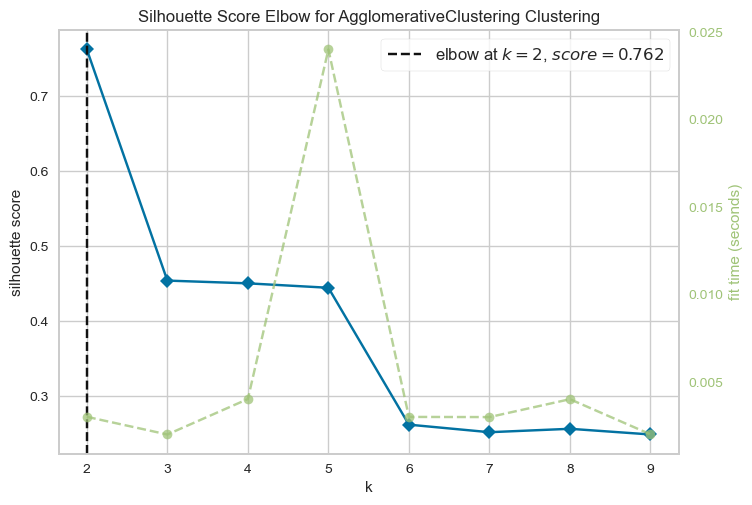

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [46]:
# ELBOW
# Evaluamos con un cluster aglomerativo
aglomerativo = AgglomerativeClustering()
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), timings = True, metric= "silhouette")
visualizer.fit(df_datos_std_clus.loc[:,['F3','F4','F5']])
visualizer.show()

A continuación se realiza el mismo análisis del número óptimo de grupos utilizando el dataset escalado y el método por defecto de KelbowVisualizer. 


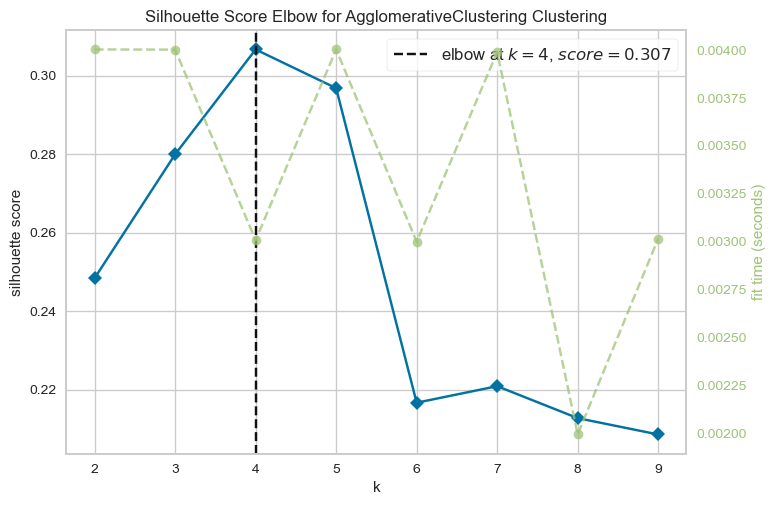

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [47]:
# Silhouette

aglomerativoSD = AgglomerativeClustering()
visualizerSD = KElbowVisualizer(aglomerativoSD, k=(2,10),metric = "silhouette", timings = True)
visualizerSD.fit(df_datos_std_clus_std.iloc[:,0:5])
visualizerSD.show()

Implementar la visualización [Silhoutte para cada observación]( https://vitalflux.com/elbow-method-silhouette-score-which-better/#:~:text=Silhouette%20analysis%2Fscores%20and%20related,of%20clusters%20in%20K%2Dmeans)  



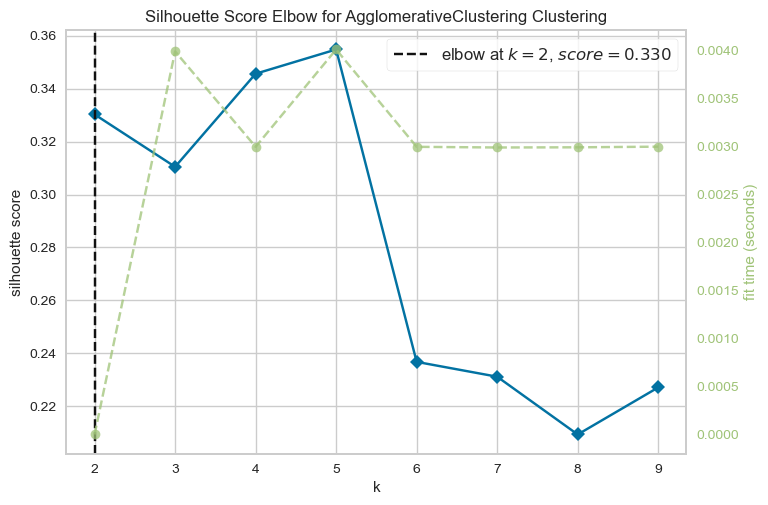

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [48]:
# ELBOW
# Evaluamos con un cluster aglomerativo

aglomerativo = AgglomerativeClustering()
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), timings = True, metric= "silhouette")
visualizer.fit(df_datos_std_1_clus.iloc[:,0:5]) 
visualizer.show()

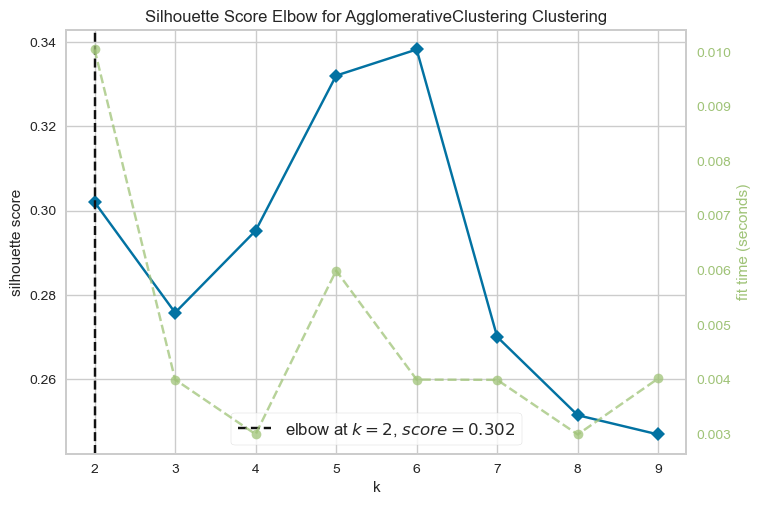

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [49]:
# ELBOW
# Evaluamos con un cluster aglomerativo

aglomerativo = AgglomerativeClustering()
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), metric = "silhouette", timings = True)
visualizer.fit(df_datos_std_1_clus_std.iloc[:,0:5]) 
visualizer.show()

Análisis del posible numero de clusters para el dataset 
df_datos_MM_clus y df_datos_MM_clus_std

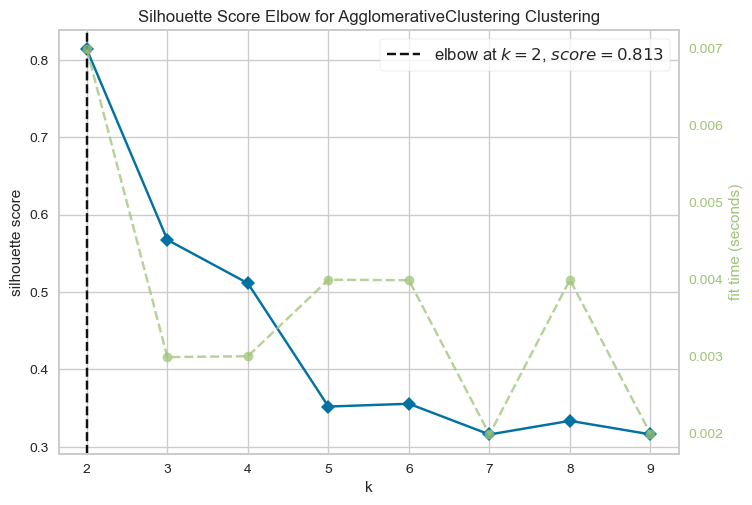

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [50]:
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), metric = 'silhouette', timing = True)
visualizer.fit(df_datos_MM_clus.loc[:,['F1','F2','F5']])
visualizer.show()

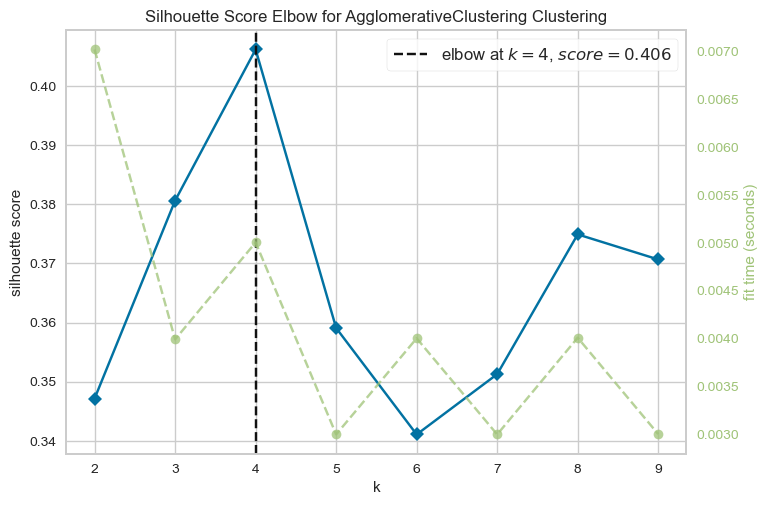

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [51]:
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), metric = 'silhouette', timings = True)
visualizer.fit(df_datos_MM_clus_std.loc[:,['F1','F4','F5']])
visualizer.show()

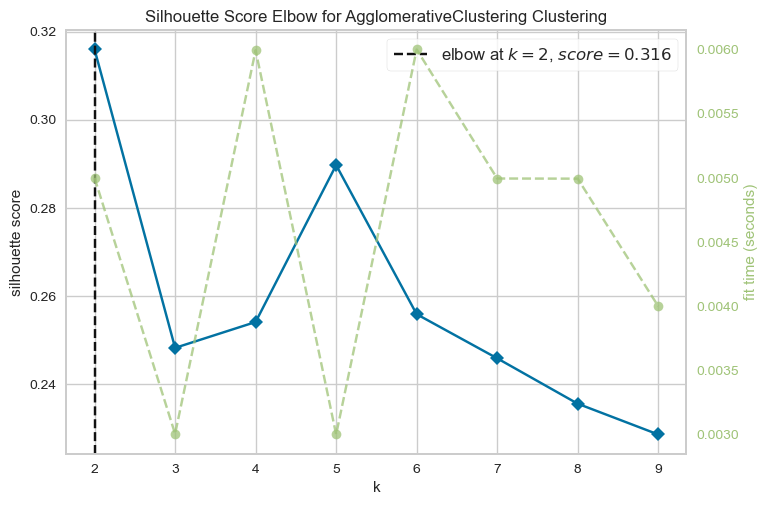

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [52]:
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), metric = 'silhouette', timings = True)
visualizer.fit(df_datos_Ptrans_clus.iloc[:,0:5])
visualizer.show()

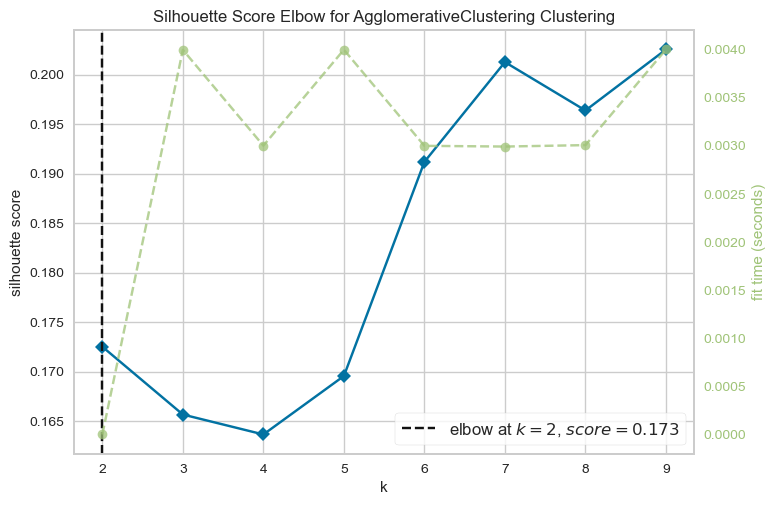

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [53]:
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), metric = 'silhouette', timings = True)
visualizer.fit(df_datos_Ptrans_clus_std.iloc[:,0:5])
visualizer.show()

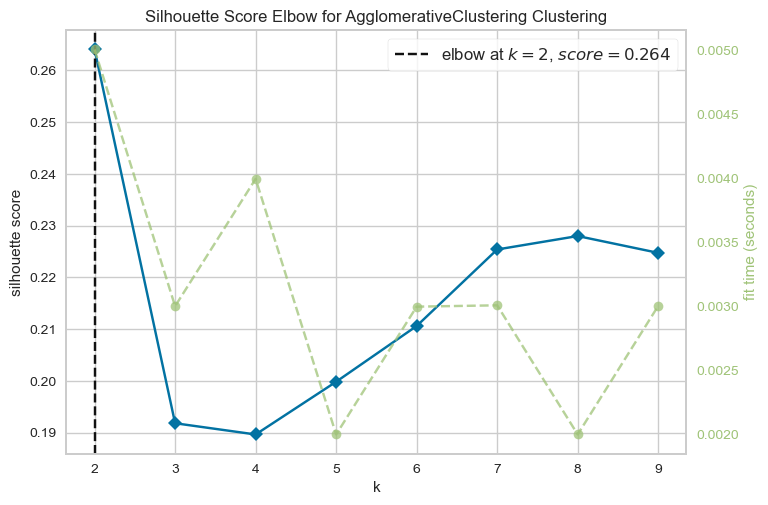

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [54]:
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), metric = 'silhouette', timings = True)
visualizer.fit(df_datos_Ptrans_1_clus.iloc[:,0:5])
visualizer.show()

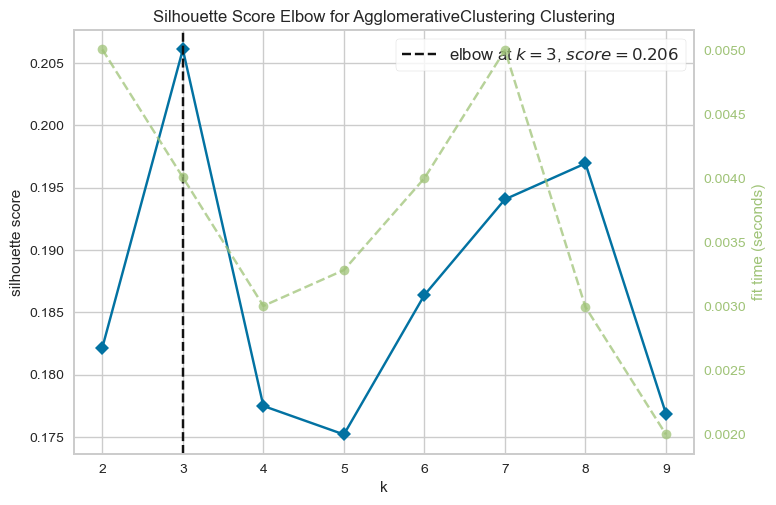

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [55]:
visualizer = KElbowVisualizer(aglomerativo, k=(2,10), metric = 'silhouette', timings = True)
visualizer.fit(df_datos_Ptrans_1_clus_std.iloc[:,0:5])
visualizer.show()

A continuación vamos a calcular el coeficiente de silhouette de forma no gráfica, para poder hacer una tabla que indique el valor del índice de silhuette para distintas combinaciones de dataset, número de cluster, y variaciones en los parametros de la función de cluster aglomeratativo. 

# 3.- Agrupamiento de las ciudades

In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sn

 Se crea un objeto con los parametros del algoritmo de agrupamiento.

In [57]:
Ag = AgglomerativeClustering(n_clusters=8)

Ajustamos el lector con los datos

In [58]:
Ag.fit(df_datos_MM_clus_std.loc[:,['F1','F4','F5']])

AgglomerativeClustering(n_clusters=8)

Se guarda en una variable el array con las etiquetas para cada observación

In [59]:
labels = Ag.labels_
labels

array([2, 5, 2, 4, 1, 1, 2, 4, 1, 7, 2, 4, 6, 4, 2, 5, 6, 5, 1, 4, 4, 2,
       1, 5, 5, 4, 2, 4, 5, 5, 6, 5, 4, 6, 2, 0, 4, 4, 4, 7, 6, 1, 1, 7,
       0, 5, 2, 1, 4, 4, 2, 0, 2, 3, 4, 1, 4, 1, 4, 6, 6, 4, 6, 3, 4, 0,
       4, 4, 2, 6, 4], dtype=int64)

Se crea una nueva variable llamada "cluster" en el dataset utilizado para generar los agrupamientos. En esta variable se identifica el cluster que corresponde a cada agrupamiento. 

In [60]:
df_datos_MM_clus_std["cluster"] = labels

In [61]:
df_datos_MM_clus_std.head(5)

F1        F2        F3        F4        F5           Ciudades  \
0 -0.339004 -0.170308  0.737639  0.658019 -0.968441           Albacete   
1  0.353123 -0.312326  0.162017 -0.788795  1.132316  Alcalá de Henares   
2  0.210770 -0.444145  4.403449  0.650693 -1.208234         Alcobendas   
3 -0.198495 -0.525388  1.214254 -0.995589 -0.363245           Alcorcón   
4 -0.988271 -0.266973 -1.088169  1.482223 -0.058267          Algeciras   

   cluster  
0        2  
1        5  
2        2  
3        4  
4        1

El número de ciudades en cada agrupamiento se muestra a continuación.

In [62]:
df_datos_MM_clus_std['cluster'].value_counts()

cluster
4    22
2    12
1    10
5     9
6     9
0     4
7     3
3     2
Name: count, dtype: int64

# V.- Representación gráfica

Una forma de identificar que tan sobrepuestos están los elementos de los agrupamientos es construir una gráfica donde visualizen las medias de cada grupo y ver que tan cerca se encuentran. Para esto vamos a cambiar de formato largo a ancho usando melt.

In [64]:
im3_melt = df_datos_MM_clus_std.loc[:,['F1','F2','F3','F4','F5','cluster']].melt(id_vars = 'cluster')

Se agrupan los datos por agrupamiento y se calcula la media por factor para cada cluster

In [65]:
 im3_groups_mean = im3_melt.groupby(['variable','cluster'])['value'].mean().reset_index() ### 
 im3_groups_mean

variable  cluster     value
0        F1        0  3.274214
1        F1        1 -0.975745
2        F1        2 -0.310431
3        F1        3 -0.994475
4        F1        4 -0.213293
5        F1        5 -0.021297
6        F1        6  0.893840
7        F1        7 -0.261905
8        F2        0 -0.536201
9        F2        1  0.201391
10       F2        2  0.451228
11       F2        3  0.131694
12       F2        4 -0.265395
13       F2        5 -0.403408
14       F2        6  0.533835
15       F2        7 -0.294125
16       F3        0 -0.108829
17       F3        1  0.108690
18       F3        2  0.218468
19       F3        3 -0.936997
20       F3        4  0.124272
21       F3        5  0.061333
22       F3        6 -0.294608
23       F3        7 -0.677904
24       F4        0 -0.753760
25       F4        1  1.918173
26       F4        2  0.621078
27       F4        3  0.870298
28       F4        4 -0.612227
29       F4        5 -0.743412
30       F4        6 -0.470537
31       F4        7 -0.321898
32       F5        0 -0.143809
33       F5        1 -0.471143
34       F5        2 -0.234165
35       F5        3  3.957644
36       F5        4 -0.483746
37       F5        5  0.655491
38       F5        6 -0.176812
39       F5        7  2.171888

Se importa la librería Seaborn y construimos la gráfica

In [66]:
import seaborn.objects as so
from seaborn import axes_style

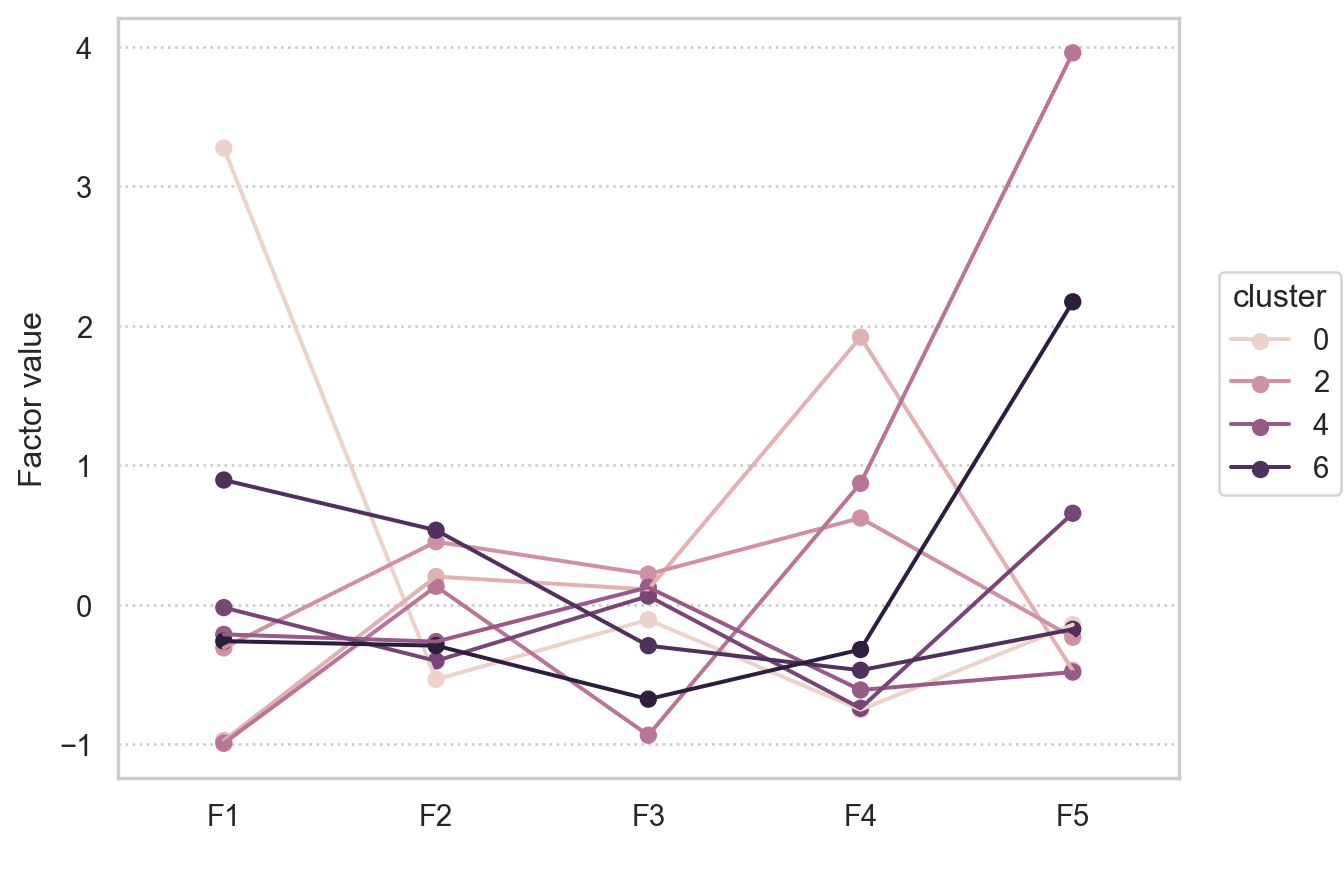

In [67]:
custom_palette = ["red", "green", "blue","black","gray"]

(
    so.Plot(im3_groups_mean, x="variable", y="value", color = "cluster").theme({**axes_style("whitegrid"), "grid.linestyle": ":"})
    .add(so.Dot())
    .add(so.Line())
    .label(
        x = "  ",
        y = "Factor value"
    )
)

## Representación gráfica por factor. Podemos ver la distribución de los puntos en un gráfico 2D, para cada combinación de factores. Y en una gráfica 3D para todas las combinaciones de 3 factores. 

Utilizamos plotly para hacer gráficas interactivas

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sn

In [69]:
fig = px.scatter(df_datos_MM_clus_std,x='F1', y='F4', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [70]:
fig = px.scatter(df_datos_MM_clus_std,x='F1', y='F5', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [71]:
fig = px.scatter(df_datos_MM_clus_std,x='F2', y='F5', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [72]:
fig = px.scatter(df_datos_MM_clus_std,x='F4', y='F5', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [73]:
fig = px.scatter(df_datos_MM_clus_std,x='F2', y='F3', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [74]:
fig = px.scatter(df_datos_MM_clus_std,x='F2', y='F4', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [75]:
fig = px.scatter(df_datos_MM_clus_std,x='F2', y='F5', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [76]:
fig = px.scatter(df_datos_MM_clus_std,x='F3', y='F4', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [77]:
fig = px.scatter(df_datos_MM_clus_std,x='F3', y='F5', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

In [78]:
fig = px.scatter(df_datos_MM_clus_std,x='F4', y='F5', color ='cluster', hover_data = ["Ciudades",'cluster'])
fig.show()

# Es posible hacer gráficas 3D

In [79]:
import plotly.express as px

fig = px.scatter_3d(df_datos_MM_clus_std,
                    x = 'F1',
                    y = 'F4',
                    z = 'F5',
                    color = 'cluster',
                     hover_data=["Ciudades", 'cluster'])

fig.show()

# 7.- Función para calcular clusteres

In [80]:
def analyzing_Agglomerative_clustering(df,n):
    Ag = AgglomerativeClustering(n_clusters=n)
    Ag.fit(df)
    df['cluster_'+ str(n)] = Ag.labels_
    return df

El análisis previo de Silhouette indica que para el dataset df_datos_stsd_clus el número de grupos con mejor un valor más alto del índice de Silhouette es de 4, y 5. 

In [81]:
df_datos_std_clus_cluster_4 = analyzing_Agglomerative_clustering(df_datos_std_clus.iloc[:,0:5],4)
df_datos_std_clus_cluster_5 = analyzing_Agglomerative_clustering(df_datos_std_clus.iloc[:,0:5],5)

In [82]:
df_datos_std_clus_cluster_4['cluster_4'].value_counts()

cluster_4
0    40
2    17
3    12
1     2
Name: count, dtype: int64

In [83]:
df_datos_std_clus_cluster_5['cluster_5'].value_counts()

cluster_5
2    36
0    17
3    12
4     4
1     2
Name: count, dtype: int64

En cambio para el estandarizado es de df_datos_stsd_clus_std es de 6 y 5

In [84]:
df_datos_std_clus_std_cluster_6 = analyzing_Agglomerative_clustering(df_datos_std_clus_std.iloc[:,0:5],6)
df_datos_std_clus_std_cluster_5 = analyzing_Agglomerative_clustering(df_datos_std_clus_std.iloc[:,0:5],5)

In [85]:
df_datos_std_clus_std_cluster_6['cluster_6'].value_counts()

cluster_6
0    24
1    16
2    16
4     9
3     4
5     2
Name: count, dtype: int64

In [86]:
df_datos_std_clus_std_cluster_5['cluster_5'].value_counts()

cluster_5
0    40
1    16
4     9
3     4
2     2
Name: count, dtype: int64

Para el dataset df_datos_MM_clus el número sugerido es de 5, 6 

In [87]:
df_datos_std_clus_std_cluster_5['cluster_5'].value_counts()

cluster_5
0    40
1    16
4     9
3     4
2     2
Name: count, dtype: int64

Para el dataset df_datos_MM_clus_std el número sugerido es de 3, 6, 8 pero todos con valores de Silhouette inferioes a 0.30. 


Para el dataset df_datos_Ptrans_clus el número óptimo sugerido es de 2, y 5. 

In [88]:
df_datos_Ptrans_clus_cluster_5 = analyzing_Agglomerative_clustering(df_datos_Ptrans_clus.iloc[:,0:5],5)

Para el escalado es de 7 y 9, pero en todos los casos con menos de 0.3 de Silhouette. 

In [89]:
df_datos_Ptrans_clus_std_cluster_7 = analyzing_Agglomerative_clustering(df_datos_Ptrans_clus_std.iloc[:,0:5],7)
df_datos_Ptrans_clus_std_cluster_9 = analyzing_Agglomerative_clustering(df_datos_Ptrans_clus_std.iloc[:,0:5],9)

A continuacion se define una funcion que permite incorporar la variacion del atributo linkage en la funcion agglomerativeClustering, e utilizar alternadamente las opciones: ward, complete, average, single. 

In [90]:
def Silhouette_score_n(df,n, linkage):
    Ag = AgglomerativeClustering(n_clusters=n, linkage = linkage )
    Ag.fit(df)
    return silhouette_score(df, Ag.labels_)

Una forma de incorporar esto es guardar una lista para los distintos numeros de cluster, y cada linkage.

In [91]:
def sil_score_df(df,df_name,n):
    
    df_inicial = pd.DataFrame(columns=["dataset","factors","n_cluster","linkage","silhouette_score"])
    linkage_methods = ['ward','complete','average','single']
    count = 0
    for i in range(2,n):
        for j in range(len(linkage_methods)):
            score = Silhouette_score_n(df,i,linkage_methods[j])
            columns = df.columns.tolist()
            df_inicial.loc[count] = [f"{df_name}",columns,i,linkage_methods[j],score]
            count += 1
        

    return df_inicial

In [92]:
sil_score_df(df_datos_std_clus_std.iloc[:,0:5],'df_datos_Ptrans_clus_std',10)

dataset               factors  n_cluster   linkage  \
0   df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          2      ward   
1   df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          2  complete   
2   df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          2   average   
3   df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          2    single   
4   df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          3      ward   
5   df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          3  complete   
6   df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          3   average   
7   df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          3    single   
8   df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          4      ward   
9   df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          4  complete   
10  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          4   average   
11  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          4    single   
12  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          5      ward   
13  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          5  complete   
14  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          5   average   
15  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          5    single   
16  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          6      ward   
17  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          6  complete   
18  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          6   average   
19  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          6    single   
20  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          7      ward   
21  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          7  complete   
22  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          7   average   
23  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          7    single   
24  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          8      ward   
25  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          8  complete   
26  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          8   average   
27  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          8    single   
28  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          9      ward   
29  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          9  complete   
30  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          9   average   
31  df_datos_Ptrans_clus_std  [F1, F2, F3, F4, F5]          9    single   

    silhouette_score  
0           0.248408  
1           0.545326  
2           0.545326  
3           0.594198  
4           0.279932  
5           0.426438  
6           0.426438  
7           0.409886  
8           0.306629  
9           0.388289  
10          0.388289  
11          0.357472  
12          0.296778  
13          0.186099  
14          0.360395  
15          0.339139  
16          0.216705  
17          0.250582  
18          0.234529  
19          0.331052  
20          0.220909  
21          0.192138  
22          0.223370  
23          0.297337  
24          0.212774  
25          0.183210  
26          0.206272  
27          0.077225  
28          0.208619  
29          0.180391  
30          0.264734  
31          0.039406

In [95]:
datasets = [df_datos_std_clus.iloc[:,0:5], df_datos_std_clus_std.iloc[:,0:5],
            df_datos_std_TM_clus.iloc[:,0:5], df_datos_std_TM_clus_std.iloc[:,0:5],
            df_datos_std_TMB_clus.iloc[:,0:5], df_datos_std_TMB_clus_std.iloc[:,0:5],
            df_datos_std_1_clus.iloc[:,0:5], df_datos_std_1_clus_std.iloc[:,0:5],
            df_datos_std_1_TM_clus.iloc[:,0:5], df_datos_std_1_TM_clus_std.iloc[:,0:5],
            df_datos_std_1_TMB_clus.iloc[:,0:5], df_datos_std_1_TMB_clus_std.iloc[:,0:5],
            df_datos_MM_clus.iloc[:,0:5], df_datos_MM_clus_std.iloc[:,0:5], 
            df_datos_MM_TM_clus.iloc[:,0:5], df_datos_MM_TM_clus_std.iloc[:,0:5],
            df_datos_MM_TMB_clus.iloc[:,0:5], df_datos_MM_TMB_clus_std.iloc[:,0:5],
            df_datos_Ptrans_clus.iloc[:,0:5], df_datos_Ptrans_clus_std.iloc[:,0:5],
            df_datos_Ptrans_TM_clus.iloc[:,0:5], df_datos_Ptrans_TM_clus_std.iloc[:,0:5],
            df_datos_Ptrans_TMB_clus.iloc[:,0:5], df_datos_Ptrans_TMB_clus_std.iloc[:,0:5],
            df_datos_Ptrans_1_clus.iloc[:,0:5], df_datos_Ptrans_1_clus_std.iloc[:,0:5],
            df_datos_Ptrans_1_TM_clus.iloc[:,0:5], df_datos_Ptrans_1_TM_clus_std.iloc[:,0:5],
            df_datos_Ptrans_1_TMB_clus.iloc[:,0:5], df_datos_Ptrans_1_TMB_clus_std.iloc[:,0:5]

            ]


datasets_names = ["df_datos_std_clus", "df_datos_std_clus_std",
                  "df_datos_std_TM_clus", "df_datos_std_TM_clus_std",
                   "df_datos_std_TMB_clus", "df_datos_std_TMB_clus_std", 
                  "df_datos_std_1_clus", "df_datos_std_1_clus_std",
                  "df_datos_std_1_TM_clus", "df_datos_std_1_TM_clus_std",
                  "df_datos_std_1_TMB_clus", "df_datos_std_1_clus_TMB_std",
                  "df_datos_MM_clus", "df_datos_MM_clus_std",
                  "df_datos_MM_TM_clus", "df_datos_MM_TM_clus_std",
                  "df_datos_MM_TMB_clus", "df_datos_MM_TMB_clus_std", 
                  "df_datos_Ptrans_clus", "df_datos_Ptrans_clus_std",
                  "df_datos_Ptrans_TM_clus", "df_datos_Ptrans_TM_clus_std",
                  "df_datos_Ptrans_TMB_clus", "df_datos_Ptrans_TMB_clus_std",
                  "df_datos_Ptrans_1_clus", "df_datos_Ptrans_1_clus_std",
                  "df_datos_Ptrans_1_TM_clus", "df_datos_Ptrans_1_TM_clus_std",
                  "df_datos_Ptrans_1_TMB_clus", "df_datos_Ptrans_1_TMB_clus_std"]

Ahora debemos ejecturar esta función en distintos dataframes

In [96]:

df_list = []


for i in range(len(datasets_names)):
    df_list.append(sil_score_df(datasets[i],datasets_names[i],10))


df_final = pd.concat(df_list)
    

In [97]:
df_final

dataset               factors  n_cluster   linkage  \
0                df_datos_std_clus  [F1, F2, F3, F4, F5]          2      ward   
1                df_datos_std_clus  [F1, F2, F3, F4, F5]          2  complete   
2                df_datos_std_clus  [F1, F2, F3, F4, F5]          2   average   
3                df_datos_std_clus  [F1, F2, F3, F4, F5]          2    single   
4                df_datos_std_clus  [F1, F2, F3, F4, F5]          3      ward   
..                             ...                   ...        ...       ...   
27  df_datos_Ptrans_1_TMB_clus_std  [F1, F2, F3, F4, F5]          8    single   
28  df_datos_Ptrans_1_TMB_clus_std  [F1, F2, F3, F4, F5]          9      ward   
29  df_datos_Ptrans_1_TMB_clus_std  [F1, F2, F3, F4, F5]          9  complete   
30  df_datos_Ptrans_1_TMB_clus_std  [F1, F2, F3, F4, F5]          9   average   
31  df_datos_Ptrans_1_TMB_clus_std  [F1, F2, F3, F4, F5]          9    single   

    silhouette_score  
0           0.695009  
1           0.695009  
2           0.695009  
3           0.734451  
4           0.299641  
..               ...  
27         -0.084429  
28          0.185814  
29          0.192158  
30          0.181174  
31         -0.053541  

[960 rows x 5 columns]

In [98]:
color_palette = ['red', 'blue', 'green', 'purple']
fig = px.scatter(df_final,x='n_cluster', y='silhouette_score', color ='linkage',
                 color_discrete_sequence=color_palette,
                  size_max=1, hover_data = ["dataset","linkage","silhouette_score"])
fig.show()

## Ahora solo queda evaluar toda la combinacion de variables 

In [99]:
import itertools

# lista de elementos
elements = ["F1", "F2", "F3", "F4", "F5"]

# List to store combinations
all_combinations = []

# Generar las combinaciones desde 2 al largo de la lista
for r in range(2, len(elements) + 1):
    combinations = list(itertools.combinations(elements, r))
    all_combinations.extend(combinations)

# convertir las tuplas a listas
all_combinations = [list(comb) for comb in all_combinations]

# Ver los resultados
print(all_combinations)


[['F1', 'F2'], ['F1', 'F3'], ['F1', 'F4'], ['F1', 'F5'], ['F2', 'F3'], ['F2', 'F4'], ['F2', 'F5'], ['F3', 'F4'], ['F3', 'F5'], ['F4', 'F5'], ['F1', 'F2', 'F3'], ['F1', 'F2', 'F4'], ['F1', 'F2', 'F5'], ['F1', 'F3', 'F4'], ['F1', 'F3', 'F5'], ['F1', 'F4', 'F5'], ['F2', 'F3', 'F4'], ['F2', 'F3', 'F5'], ['F2', 'F4', 'F5'], ['F3', 'F4', 'F5'], ['F1', 'F2', 'F3', 'F4'], ['F1', 'F2', 'F3', 'F5'], ['F1', 'F2', 'F4', 'F5'], ['F1', 'F3', 'F4', 'F5'], ['F2', 'F3', 'F4', 'F5'], ['F1', 'F2', 'F3', 'F4', 'F5']]


In [100]:
df_list = []

for i in range(len(datasets_names)):
    for j in all_combinations:
       df_list.append(sil_score_df(datasets[i].loc[:,j],datasets_names[i],10))


df_final = pd.concat(df_list).reset_index(drop = True)

In [101]:
df_final = pd.concat(df_list).reset_index(drop = True)

In [102]:
df_final.to_csv('df_final.csv')

In [104]:
df_final.query("n_cluster > 5").sort_values(by = 'silhouette_score', ascending = False).head(10)

dataset   factors  n_cluster  linkage  \
10162          df_datos_MM_clus  [F2, F4]          6  average   
14259  df_datos_MM_TMB_clus_std  [F1, F5]          6   single   
14258  df_datos_MM_TMB_clus_std  [F1, F5]          6  average   
6035    df_datos_std_1_clus_std  [F2, F5]          6   single   
10931      df_datos_MM_clus_std  [F1, F5]          6   single   
10930      df_datos_MM_clus_std  [F1, F5]          6  average   
12594   df_datos_MM_TM_clus_std  [F1, F5]          6  average   
12595   df_datos_MM_TM_clus_std  [F1, F5]          6   single   
11730       df_datos_MM_TM_clus  [F1, F4]          6  average   
10066          df_datos_MM_clus  [F1, F4]          6  average   

       silhouette_score  
10162          0.550055  
14259          0.547820  
14258          0.547820  
6035           0.543540  
10931          0.543211  
10930          0.543211  
12594          0.543000  
12595          0.543000  
11730          0.538920  
10066          0.538217

In [105]:
#color_palette = ['red', 'blue', 'green', 'white']
fig = px.scatter(df_final.query("n_cluster > 1"),x='n_cluster', y='silhouette_score', color ='linkage',
                 #color_discrete_sequence=color_palette,
                  size_max=0.0, hover_data = ["dataset","linkage","factors","silhouette_score"])
fig.show()

# FIN